# 6.5 Machine Learning Part 2

###  This script contains the following:

#### 1. Import Libraries adn Data

#### 2. The elbow technique

#### 3. kmeans clustering

## 1. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# Show graphs in notebook

%matplotlib inline

In [3]:
path = r'C:\Users\nehat\OneDrive\Desktop\CF DA Immersion\Achievement 6\Aviation Accidents In The US'

In [4]:
df =  pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'regression_analysis.csv'))

In [5]:
df.shape

(84794, 25)

In [6]:
df.head()

,Unnamed: 0,Investigation.Type,Event.Date,Country,Latitude,Longitude,Airport.Name,Aircraft.Damage,Aircraft.Category,Make,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.Of.Flight,City,State,InjurySeverityType,Aircraft Size
0,0,Accident,2/16/2021,United States,42.595377,-89.030245,NaN,Substantial,Airplane,Velocity,...,2.0,0.0,0.0,0.0,VMC,NaN,JANESVILLE,WI,Fatal,Medium Aircraft
1,1,Accident,2/15/2021,United States,18.354444,-65.027778,NaN,Destroyed,Helicopter,Bell,...,4.0,0.0,0.0,0.0,VMC,NaN,St Thomas,CB,Fatal,Small Aircraft
2,2,Accident,2/13/2021,United States,61.336392,-152.016430,NaN,Substantial,Airplane,Maule,...,0.0,0.0,2.0,0.0,NaN,NaN,TYONEK,AK,Minor,Small Aircraft
3,3,Accident,2/12/2021,United States,43.297731,-89.755693,SAUK-PRAIRIE,Substantial,Airplane,Cessna,...,0.0,0.0,0.0,1.0,VMC,NaN,PRAIRIE DU SAC,WI,Non-Fatal,Small Aircraft
4,4,Accident,2/10/2021,United States,27.243723,-81.413767,NaN,Substantial,Airplane,Piper,...,0.0,0.0,1.0,0.0,NaN,NaN,LAKE PLACID,FL,Minor,Small Aircraft


In [7]:
# Drop columns

df.drop(columns = ["Unnamed: 0"], inplace = True)

In [8]:
df.columns

Index(['Investigation.Type', 'Event.Date', 'Country', 'Latitude', 'Longitude',
       'Airport.Name', 'Aircraft.Damage', 'Aircraft.Category', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.Phase.Of.Flight', 'City', 'State', 'InjurySeverityType',
       'Aircraft Size'],
      dtype='object')

In [9]:
# Drop categorical columns

df2 = df.drop(columns = ['Latitude', 'Longitude','Investigation.Type','Event.Date', 'Country','Airport.Name', 'Aircraft.Damage', 'Aircraft.Category', 'Make', 'Model', 'Amateur.Built', 'Engine.Type', 'Purpose.of.flight', 'Weather.Condition', 'Broad.Phase.Of.Flight', 'City', 'State', 'InjurySeverityType', 'Aircraft Size'])

In [10]:
df2.columns

Index(['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured'],
      dtype='object')

### 2. The Elbow Technique

In [11]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [12]:
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))]

score

[-67294679.90001027,
 -17571417.321056504,
 -9283343.81192975,
 -6962959.409282018,
 -5201344.73099688,
 -3773004.484459583,
 -3081062.5230735755,
 -2665610.681626467,
 -2297442.2591348337]

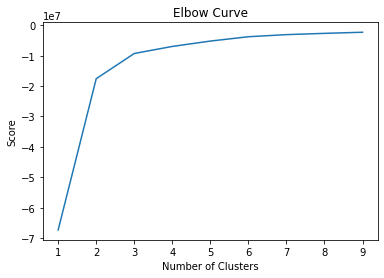

In [13]:
# Plot the elbow curve using PyLab.

curve = pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### From the elbow curve we can see that the curve straigthens out at 3, which will be the optimal count for the clusters.

### 3. k-means clustering

In [14]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [15]:
# Fit the k-means object to the data.

kmeans.fit(df2)

C:\Users\nehat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [16]:
df2['clusters'] = kmeans.fit_predict(df2)

C:\Users\nehat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [17]:
df2.head()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,clusters
0,2.0,2.0,0.0,0.0,0.0,0
1,1.0,4.0,0.0,0.0,0.0,0
2,1.0,0.0,0.0,2.0,0.0,0
3,1.0,0.0,0.0,0.0,1.0,0
4,1.0,0.0,0.0,1.0,0.0,0


In [18]:
df2['clusters'].value_counts()

0    82929
1     1515
2      350
Name: clusters, dtype: int64

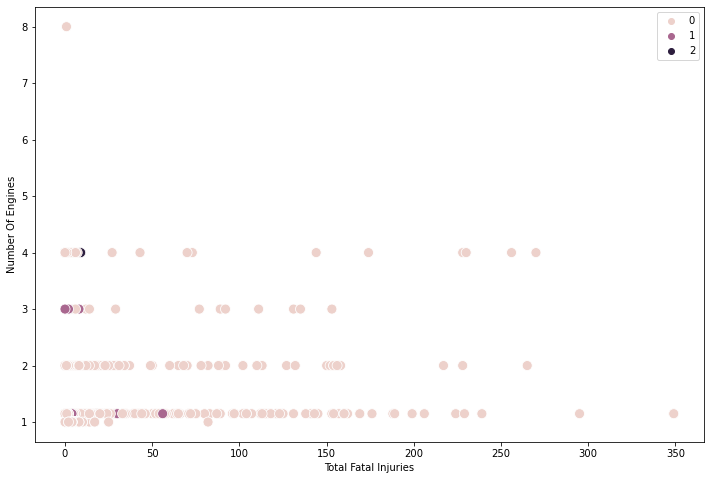

In [19]:
# Plot the clusters for the "Total Fatal Injuries" and "Number of Engines" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Total.Fatal.Injuries'], y=df2['Number.of.Engines'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Total Fatal Injuries')
plt.ylabel('Number Of Engines')
plt.show()

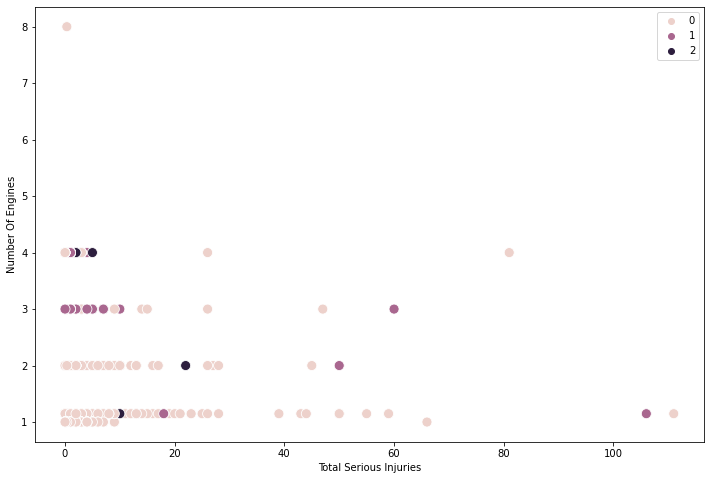

In [20]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Total.Serious.Injuries'], y=df2['Number.of.Engines'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Total Serious Injuries')
plt.ylabel('Number Of Engines')
plt.show()

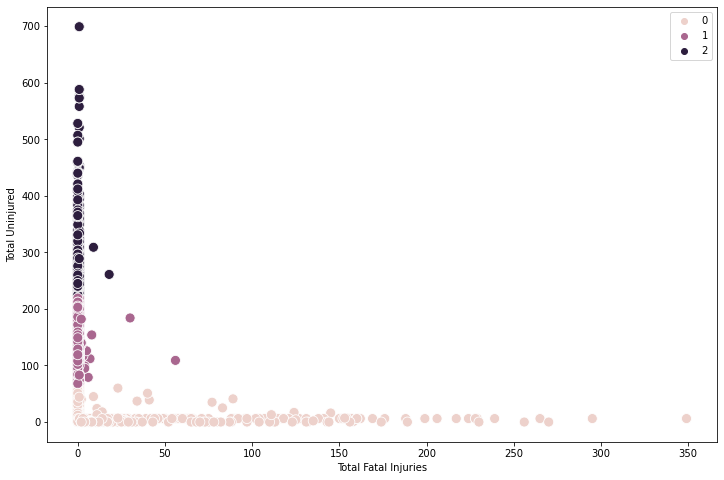

In [21]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Total.Fatal.Injuries'], y=df2['Total.Uninjured'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Total Fatal Injuries')
plt.ylabel('Total Uninjured')
plt.show()

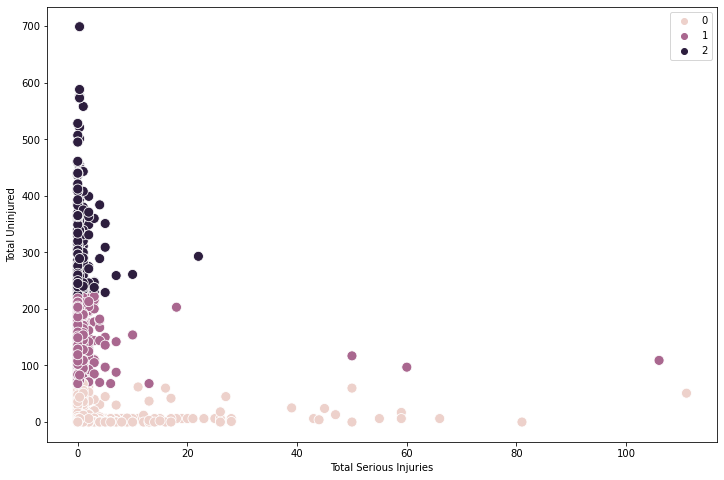

In [22]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Total.Serious.Injuries'], y=df2['Total.Uninjured'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Total Serious Injuries')
plt.ylabel('Total Uninjured')
plt.show()

#### The first two scatterplots are very similar to the the patterns I have already seen in the previous tasks. The only difference here is the clusters shown by the different colors. Clusters coded as "0" are the most popular as we see on the scatterplots indicated by the lighest shade. Although we see the same pattern as previously we do not see "clusters" as such. So for these variables I do not think that clustering works.
#### In the latter two scatterplots there seems to be some element of clustering showing that the lower number of serious or fatal injuries the greater the number of uninjured persons. 

In [23]:
df2.loc[df2['clusters'] == 2, 'cluster'] = 'dark purple'
df2.loc[df2['clusters'] == 1, 'cluster'] = 'purple'
df2.loc[df2['clusters'] == 0, 'cluster'] = 'pink'

In [24]:
# Descriptive analysis for clusters

df2.groupby('cluster').agg({'Number.of.Engines':['mean', 'median'], 
                         'Total.Fatal.Injuries':['mean', 'median'], 
                         'Total.Serious.Injuries':['mean', 'median'],
                          'Total.Minor.Injuries':['mean', 'median'],
                           'Total.Uninjured':['mean', 'median']})

Number.of.Engines        Total.Fatal.Injuries            \
                         mean median                 mean    median   
cluster                                                               
dark purple          2.524642    2.0             0.560492  0.847037   
pink                 1.141616    1.0             0.855852  0.847037   
purple               2.050321    2.0             0.560462  0.847037   

            Total.Serious.Injuries           Total.Minor.Injuries            \
                              mean    median                 mean    median   
cluster                                                                       
dark purple               0.591260  0.330833             2.536085  0.521104   
pink                      0.321892  0.000000             0.479189  0.521104   
purple                    0.635309  0.330833             2.315948  0.521104   

            Total.Uninjured         
                       mean median  
cluster                             
dark purple      311.742857  288.0  
pink               2.564808    1.0  
purple           132.670627  131.0

#### For the most of the results the dark purple cluster has  better results closely followed by the purple and then lastly by the pink cluster. The median number of engines is 2 for 2 of the clusters. The median for total fatal injuries is the same for each cluster as is the median for total minor injuries. 

#### The results from this analysis feel like they are a little difficult to use in the future. I feel that there does not seem to be sufficient /results to really find a pattern with the limiting columns that are used for this analysis. The causes of the injuries, which ever types of injuries can not only be based on the number of engines/size of the aircraft. I would want to know if there were other factors that affected the results and caused the different degree of injuries.
#### If I wanted to look at the results to improve saftey for example then being able to use the make or model may help make suggestions to improve aircrafts and their safety profiles. Clustering with this data set may not provide justice to the anlaysis and with data missing and filled in with descriptive statistics may not always provide an accurate enough result. 

In [25]:
# Export file

df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'clustering.csv'))

In [26]:
# Export file

df2.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'clustering.csv'))